# Capstone Project: Understanding Ohio Voting Precincts

## Introduction

In the 2016 U.S. Presidential election, Donald J. Trump famously won the electoral college vote (although he lost the popular vote), despite the popularly held convention that he couldn't win, and was behind in most predictive polls. Some have said that the media and people on the left of the political spectrum just did not want to believe that Trump could possibly win, and therefore ignored what was evident in the statistical polling data. However, the polls really did show a strong preference for Clinton over Trump. It's unclear as to why the polls were so wrong, but begs the question: are there other ways to explain the way a state, district, or precinct votes?

In theory, the President of the United States makes policy and guides the nation in tangible and intangible ways. Therefore, the mechanics of how the U.S. electorate votes for the President has consequences for everyone. There are innumerable ways to do this, but this work examines the stereotype that rural areas vote Republican and urban areas vote Democrat. 

## Data Acquisition, Cleaning & Exploration

In order to make the problem of "rural" versus "urban" voting preferences more manageable, the focus has been narrowed from the whole country down to the swing-state of Ohio only. We need three different sets of data: (1) Ohio precinct-level raw vote counts; (2) Ohio precinct shapes/boundaries in latitude/longitude format; and, (3) some sort of data reflecting the rural or urban nature of the precinct. 

#### Data: Precinct Shapes & Raw Vote Counts

I was shocked to find that raw precinct-level voting data information is not publicly available from state or federal agencies. In fact, only aggregated voting district counts (districts are made up of precincts) are available. After much online sleuthing, I tracked down the data I needed from the Metric Geometry and Gerrymandering Group (MGGG). The main goal of the MGGG is actually to "find out what type of data \[they\] could obtain from the individual counties in Ohio on their precinct boundaries, and to work towards turning that into a unified statewide shapefile." Available from their GitHub repository (https://github.com/mggg/ohio-precincts), the MGGG provides a GeoPandas (http://geopandas.org) geopackage shape file containing raw votes and shape coordinates for each precinct. They were not able to develop only a handful of precincts, and so, these are not included in the analysis that follows.

So let's take a look at this GeoPandas data:

In [2]:
# import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# adjust pandas display properties
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 40) # had to limit for readability w/ polygon values

In [4]:
# read in the manually downloaded geopackage data file
precincts_gdf = gpd.read_file("precincts_results.gpkg")

In [5]:
# check it out
print(precincts_gdf.shape)
print(precincts_gdf.columns)
precincts_gdf.head()

(10592, 38)
Index(['PRECINCT', 'COUNTY', 'global_id', 'COUNTYGEOID10',
       'PRECINCT_election_results', 'PRECINCTCODE_election_results',
       'PRECINCT_misfit', 'county_name', 'precinct_code', 'region_name',
       'media_market', 'pres_16_registered_voters', 'pres_16_total_voters',
       'pres_16_turnout_percentage', 'pres_16_james_jerome_bell_wi',
       'pres_16_michael_bickelmeyer_wi', 'pres_16_darrell_l_castle_wi',
       'pres_16_hillary_clinton_d', 'pres_16_richard_duncan',
       'pres_16_cherunda_fox_wi', 'pres_16_ben_hartnell_wi',
       'pres_16_tom_hoefling_wi', 'pres_16_bruce_e_jaynes_wi',
       'pres_16_gary_johnson', 'pres_16_chris_keniston_wi',
       'pres_16_barry_kirschner_wi', 'pres_16_laurence_kotlikoff_wi',
       'pres_16_joseph_maldonado_wi', 'pres_16_michael_andrew_maturen_wi',
       'pres_16_evan_mc_mullin_wi', 'pres_16_monica_moorehead_wi',
       'pres_16_joe_schriner_wi', 'pres_16_mike_smith_wi',
       'pres_16_jill_stein_g', 'pres_16_josiah_r_stro

,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((394208.1309668442 4296804...
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((399776.4066106104 4299391...
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((395684.3247016144 4297527...
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((399263.2164539802 4309896...
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((394490.6016695436 4310216...


As we can see, in this dataframe, we now have the first and second data sets we require for the proposed analysis. Each row contains precinct indentification information, followed by raw vote counts, and the final column contains the geopackage precinct shape data. The geopackage shape data provides location data to define the boundaries of each precinct. In the following section, we will be acquiring venue (restaurants, stores, etc.) data for each precinct. In order to do this, we will need a central location data point for each precinct. Therefore, we calculate each precinct centroid using the precinct boundary data.

In [6]:
# convert geocoding to classic lat/long (need for calls to Foursquare)
print("Original Coordinate Reference System (CRS): ",precincts_gdf.crs)
precincts_gdf = precincts_gdf.to_crs(epsg=4326)
print("NEW Coordinate Reference System (CRS): ",precincts_gdf.crs)

Original Coordinate Reference System (CRS):  {'init': 'epsg:2958'}
NEW Coordinate Reference System (CRS):  {'init': 'epsg:4326', 'no_defs': True}


To make sure we have done this correctly, the following code identifies a small sample of precincts which contain 'Napoleon' in the name, and plots the corresponding precincts with their centroids.

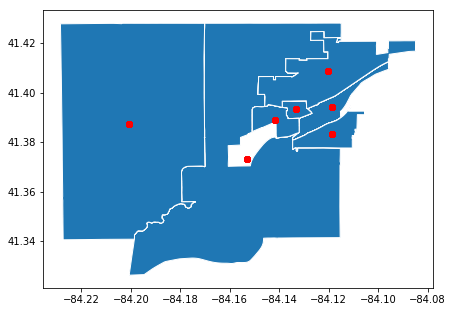

In [7]:
# look at only precincts that make up the *Napoleon* group of precincts
Napoleon_df = precincts_gdf[precincts_gdf["PRECINCT"]=='Napoleon'].copy()

# allocate empty lists for latitude and longitude of each of these precincts
Nap_lon = []
Nap_lat = []

# loop over all precincts Napoleon
for i in range(0,Napoleon_df.shape[0]):
    lon = Napoleon_df.iloc[i]["geometry"].centroid.coords[0][0]
    lat = Napoleon_df.iloc[i]["geometry"].centroid.coords[0][1]
    #print(lon, lat)
    Nap_lon.append(lon)
    Nap_lat.append(lat)
    
# convert lists to dataframes
Nap_lon_df = pd.DataFrame(Nap_lon)
Nap_lat_df = pd.DataFrame(Nap_lat)
#print(Nap_lon_df.shape)
#print(type(Nap_lon_df))
Nap_lon_df.head()

# reset row indices (index) so that index matches on columns to be added
Napoleon_df.reset_index(inplace=True)

# add lon/lat columns to original Napoleon_df dataframe to plot
Napoleon_df["centroid_lon"] = Nap_lon_df
Napoleon_df["centroid_lat"] = Nap_lat_df
#print(Napoleon_df.shape)
Napoleon_df.head()

# plot Napoleon precincts
Napoleon_df.plot(figsize=[7,7], edgecolor='white')

# plot centroid of each Napoleon precincts
for i in range(0,Napoleon_df.shape[0]):
        
    plt.scatter(Napoleon_df.iloc[i]["centroid_lon"], 
                Napoleon_df.iloc[i]["centroid_lat"], 
                color='r')

So, let's apply this approach to the whole dataframe. But first we must do a bit of cleaning.

In [8]:
# indices columns containing raw vote counts
i_start = precincts_gdf.columns.get_loc("pres_16_james_jerome_bell_wi")
i_end = precincts_gdf.columns.get_loc("pres_16_donald_j_trump_r")

# drop any row that has a null/NaN/inf value in ANY of the vote count columns
for i in range(i_start,i_end+1):
    precincts_gdf = precincts_gdf[~pd.isnull(precincts_gdf.iloc[:,i])].copy()
    
# reset row index values to for easy looping AND to add new columns (index values must match)
precincts_gdf.reset_index(inplace=True)

# remove COLUMN named 'index'
precincts_gdf.drop('index', axis=1, inplace=True)

# only keep rows with non-empty geometry cells (make copy to avoid slice overwriting)
ohio_df = precincts_gdf[~precincts_gdf["geometry"].is_empty].copy()

In [9]:
# check
print(ohio_df.shape)
ohio_df.head()

(10295, 38)


,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...


Calculate the centroids for all precincts and add to dataframe.

In [10]:
# allocate empty lists for latitude and longitude
oh_lon = []
oh_lat = []

# loop over all precincts Napoleon
for i in range(0,ohio_df.shape[0]):
    lon = ohio_df.iloc[i]["geometry"].centroid.coords[0][0]
    lat = ohio_df.iloc[i]["geometry"].centroid.coords[0][1]
    oh_lon.append(lon)
    oh_lat.append(lat)
    
# convert lists to dataframes
oh_lon_df = pd.DataFrame(oh_lon)
oh_lat_df = pd.DataFrame(oh_lat)
#print(Nap_lon_df.shape, Nap_lat_df.shape)

In [11]:
# add lon/lat columns to original Napoleon_df dataframe to plot
ohio_df["centroid_lon"] = oh_lon_df
ohio_df["centroid_lat"] = oh_lat_df

In [12]:
# check
print(ohio_df.shape)
ohio_df.head()

(10295, 40)


,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...,-82.213177,38.806066
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...,-82.177677,38.824904
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...,-82.211522,38.816566
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...,-82.178235,38.890661
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...,-82.157784,38.969485


Ok, this is all we need for the next section. However, let's do a little bit more work here by creating a binary "winner" column (0=Trump, 1=Clinton) and plot all precincts colored by "winner" (red=Trump, blue=Clinton).

In [13]:
# list of columns that contain vote counts
vote_columns = ['pres_16_james_jerome_bell_wi',
       'pres_16_michael_bickelmeyer_wi', 'pres_16_darrell_l_castle_wi',
       'pres_16_hillary_clinton_d', 'pres_16_richard_duncan',
       'pres_16_cherunda_fox_wi', 'pres_16_ben_hartnell_wi',
       'pres_16_tom_hoefling_wi', 'pres_16_bruce_e_jaynes_wi',
       'pres_16_gary_johnson', 'pres_16_chris_keniston_wi',
       'pres_16_barry_kirschner_wi', 'pres_16_laurence_kotlikoff_wi',
       'pres_16_joseph_maldonado_wi', 'pres_16_michael_andrew_maturen_wi',
       'pres_16_evan_mc_mullin_wi', 'pres_16_monica_moorehead_wi',
       'pres_16_joe_schriner_wi', 'pres_16_mike_smith_wi',
       'pres_16_jill_stein_g', 'pres_16_josiah_r_stroh_wi',
       'pres_16_douglas_w_thomson_wi', 'pres_16_donald_j_trump_r']

# create column with lead vote winner name
ohio_df["winner"] = ohio_df[vote_columns].astype(int).idxmax(axis='columns')

# create empty list containing for winner as binary: 0/1 == Trump/Hillary
win_bi = []

# assign binary values...
for i in range(0,ohio_df.shape[0]):
    if (ohio_df.iloc[i]["winner"] == "pres_16_donald_j_trump_r"):
        win_bi.append(0)
    elif (ohio_df.iloc[i]["winner"] == "pres_16_hillary_clinton_d"):
        win_bi.append(1)
    else:
        print("else @ i=",i)
        #win_bi.append(2)
        
#win_bi
ohio_df["winner_binary"] = win_bi

In [14]:
# add column 'Precinct_ID' == index
ohio_df["Precinct_ID"] = ohio_df.index

# move "Precinct_ID" to first column
ohio_df = ohio_df.set_index('Precinct_ID').reset_index()

In [15]:
# check final dataframe (last 5 columns are relevant for plotting)
print(ohio_df.shape)
ohio_df.head()

(10295, 43)


,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary
0,0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...,-82.213177,38.806066,pres_16_donald_j_trump_r,0
1,1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...,-82.177677,38.824904,pres_16_donald_j_trump_r,0
2,2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...,-82.211522,38.816566,pres_16_donald_j_trump_r,0
3,3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...,-82.178235,38.890661,pres_16_donald_j_trump_r,0
4,4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...,-82.157784,38.969485,pres_16_donald_j_trump_r,0


In [16]:
# convert back to original CRS for improved plotting
ohio_df = ohio_df.to_crs(epsg=2958)

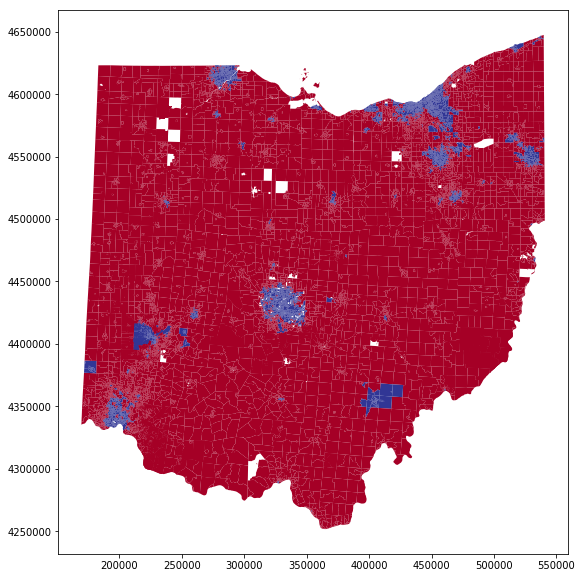

In [17]:
# plot (red=Trump, blue=Clinton)
ohio_df.plot(column='winner_binary', figsize=[10,10], cmap='RdYlBu')

#### Data: Defining Rural and Urban Precincts

The third data set we need must somehow characterize "rural" and "urban" voting areas. To do this, we will utilize Foursquare (www.foursquare.com) venue data to generate feature sets for each precinct. The feature sets will be comprised of the category types (i.e. "Italian Restaurant", "Gas Station", "Auto Mechanic", etc.) for the venues found in each precinct. Calls to the Foursquare API return JSON information, which we will tranform into a Pandas dataframe for analysis. Although we won't initially label precincts as rural or urban, once we have done some analysis, we will see if there are voting patterns for precincts with very few, or zero, venues (presumed to be rural), versus precincts with many venues (presumed to be urban).

Let's take a look at the Foursquare data:

In [18]:
# import libraries
import json # JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [19]:
# Foursqaure credentials and version info
CLIENT_ID = 'LP5VHPFD4PUKCOMHHJALFLDBF5INH5IUO45AYV4RZXDE505R' # your Foursquare ID
CLIENT_SECRET = 'VXXTJLOK5SACL4AMNMONAATB3UR4JSOST2OLF4PBJZMPE0RG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: LP5VHPFD4PUKCOMHHJALFLDBF5INH5IUO45AYV4RZXDE505R
CLIENT_SECRET:VXXTJLOK5SACL4AMNMONAATB3UR4JSOST2OLF4PBJZMPE0RG


In [20]:
# Create a function to "explore" (get venues for) all the precincts
def getNearbyVenues(names, latitudes, longitudes, radius=3500, LIMIT = 100):
    
    # allocate empty venues list
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        #results = requests.get(url).json()["response"]['groups'][0]['items']
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print(name)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Precinct_ID', 
                  'Precinct Latitude', 
                  'Precinct Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

It should be noted that "The Foursquare API has a limit of 950 Regular API Calls per day". However, by verifying your Foursquare account with a credit card (which is not charged), this limit is raised to 99,500 calls per day. The following raw text cell shows the code to request the Foursquare data, but is not used here. Instead I have previously run this code and saved the Foursquare data to CSV file, since getting this information from the Foursquare API can be time consuming.

In [21]:
# # call the function
# precinct_venues = getNearbyVenues(names=pd.Series(ohio_df.index.values),
#                                  latitudes=ohio_df['centroid_lat'],
#                                  longitudes=ohio_df['centroid_lon']
#                                  )

Load the Foursquare venue data that I had previously saved to a CSV file:

In [22]:
# load the cached Foursqaure data (rather make calls to FQ API again)
# precinct_venues = pd.read_csv("precinct_venues_FQ.csv")
precinct_venues = pd.read_csv("precinct_venues_3500_FQ.csv")

In [23]:
# drop 'Unnamed: 0' column
precinct_venues.drop(['Unnamed: 0'], axis=1, inplace=True)

# rename column to match column in ohio_df
precinct_venues.rename(columns={"Precinct": "Precinct_ID"}, inplace=True)

In [24]:
# check it out
print(precinct_venues.shape)
print(precinct_venues.columns)
precinct_venues.head()

(449751, 7)
Index(['Precinct_ID', 'Precinct Latitude', 'Precinct Longitude', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')


,Precinct_ID,Precinct Latitude,Precinct Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,38.806066,-82.213177,Courtside Bar And Grill,38.806786,-82.206826,Bar
1,0,38.806066,-82.213177,Shake Shoppe,38.814543,-82.194659,Fast Food Restaurant
2,0,38.806066,-82.213177,Dollar General,38.807222,-82.206783,Discount Store
3,0,38.806066,-82.213177,Speedway,38.813934,-82.197190,Gas Station
4,0,38.806066,-82.213177,Tuscany Cuccini,38.817761,-82.185092,Italian Restaurant


In [25]:
precinct_venues.tail()

,Precinct_ID,Precinct Latitude,Precinct Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
449746,10294,41.032801,-84.401259,iyo,39.158250,-84.275039,Frozen Yogurt Shop
449747,10294,41.032801,-84.401259,Verizon Wireless @ Rivers Edge,39.159056,-84.275716,Mobile Phone Shop
449748,10294,41.032801,-84.401259,Ruby Tuesday,39.161576,-84.271743,American Restaurant
449749,10294,41.032801,-84.401259,Terrace Park Country Club,39.157412,-84.292904,Golf Course
449750,10294,41.032801,-84.401259,Walmart,39.159451,-84.279998,Big Box Store


As we can see, each row contains venue location and category data. Each venue is mapped to the corresponding precinct. Some precincts may have multiple venues, so are shown in multiple rows. Some precincts may not have any venues, so are not present in this dataframe. 

In [32]:
print('Between all precincts, there are {} precincts voting areas with at least one venue.'.format(len(precinct_venues["Precinct_ID"].unique())))

Between all precincts, there are 10214 precincts voting areas with at least one venue.


## Remaining Analytical Work

To complete this project, the following tasks remain:

- Clean dataframes.

- Convert venue category data into one-hot feature set.

- Merge the precinct vote/shape dataframe with the precinct one-hot venue dataframe.

- Apply k-means clustering algorthim to merged dataframe.

- Analyze results of clustering. 

- If results are good, characterize the clusters based on their respective features. 

- If the results are not good, consider feature selection (food-related venues only?) or application of other machine learing techniques (other clustering algorithms, and classification algortihms, changing the radius in which venues are found for each precinct).

#### Data: Convert venue categories to one-hot feature set

In [37]:
# import library
import numpy as np

In [29]:
# one hot encoding
precinct_onehot = pd.get_dummies(precinct_venues[['Venue Category']], prefix="", prefix_sep="")

# check
print(precinct_onehot.shape)
precinct_onehot.head()

(449751, 478)


,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Medical Supply Store,Medit

In [30]:
precinct_onehot.tail()

,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Medical Supply Store,Medit

In [33]:
sum(precinct_onehot["Neighborhood"].unique())

1.0

In [34]:
# replace column 'Neighborhood' ==> 'Precinct'
precinct_onehot.rename(columns={"Neighborhood": "Precinct_ID"}, inplace=True)
                                
# check
print(precinct_onehot.shape)
precinct_onehot.head(10)

(449751, 478)


,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Medical Supply Store,Medit

In [35]:
# convert current neighborhood column from one-hot to the actual neighborhood name
precinct_onehot['Precinct_ID'] = precinct_venues['Precinct_ID']

# move neighborhood column to the first column
precinct_onehot = precinct_onehot.set_index('Precinct_ID').reset_index()

# check
print(precinct_onehot.shape)
precinct_onehot.head(10)

(449751, 478)


,Precinct_ID,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Medical Supply

In [39]:
# combine each unique precinct into a single row ==> take average of one-hot values
precinct_grouped = precinct_onehot.groupby('Precinct_ID').mean().reset_index()

# check
print(precinct_grouped.shape)
precinct_grouped.head()

(10214, 478)


,Precinct_ID,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Medical Supply

#### Data: Merge precinct voting dataframe & Foursquare one-hot venue dataframe

In [40]:
# merge based on the index of each dataframe
df_merged = ohio_df.merge(precinct_grouped, how='outer', on='Precinct_ID')

In [41]:
print(df_merged.shape)
df_merged.head()

(10295, 520)


,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food S

In [42]:
df_merged.tail()

,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food S

In [43]:
# find column indices for one-hot section of new df
j_start = df_merged.columns.get_loc("ATM")
j_end = df_merged.columns.get_loc("Zoo Exhibit")
print(j_start,j_end)

43 519


In [44]:
# assign value of zero to all NaN values in one-hot section of df_merged
df_merged.fillna(0, inplace=True)

In [45]:
print(df_merged.shape)
df_merged.head()

(10295, 520)


,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food S

## Methodology

#### Methodology: Clustering with K-Means (k=2, all precincts)

In [46]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [48]:
# isolate one-hot section
print(df_merged.iloc[:,j_start:].shape)
#df_merged.iloc[:,j_start:].head()
df_merged.iloc[0:5,j_start:j_end+1]

(10295, 477)


,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Medical Supply Store,Medit

In [49]:
# set number of clusters
kclusters = 2

# isolate one-hot section of df_merged
oh_clust = df_merged.iloc[:,j_start:j_end+1]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oh_clust)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [50]:
# add column for cluster labels
df_merged.insert(0, 'cluster', kmeans.labels_)

In [51]:
print(df_merged.shape)
df_merged.head()

(10295, 521)


,cluster,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Healt

In [52]:
df_merged["cluster"].unique()

array([0, 1])

In [53]:
df_merged["cluster"].value_counts()

1    5507
0    4788
Name: cluster, dtype: int64

In [54]:
ohio_df["winner_binary"].value_counts()

0    7163
1    3132
Name: winner_binary, dtype: int64

In [55]:
df_merged["winner_binary"].value_counts()

0    7163
1    3132
Name: winner_binary, dtype: int64

In [56]:
#predictions = np.where(df_merged["cluster"]==df_merged["winner_binary"], True, False)

In [58]:
df_merged["predictions"] = np.where(df_merged["cluster"]==df_merged["winner_binary"], True, False)

In [59]:
print(df_merged.shape)
df_merged.head()

(10295, 522)


,cluster,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Healt

In [60]:
df_merged["predictions"].value_counts()

True     5806
False    4489
Name: predictions, dtype: int64

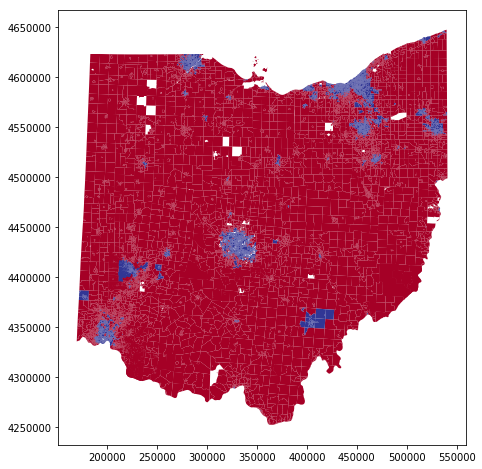

In [61]:
# plot ACTUAL winners
df_merged.plot(column='winner_binary', figsize=[8,8], cmap='RdYlBu')

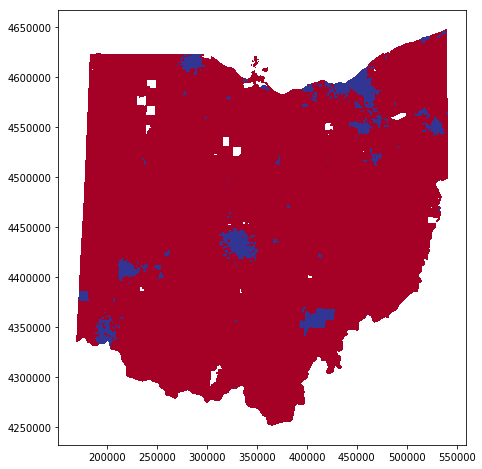

In [62]:
# plot ACTUAL winners
df_merged.plot(column='winner_binary', figsize=[8,8], antialiased=False, cmap='RdYlBu')

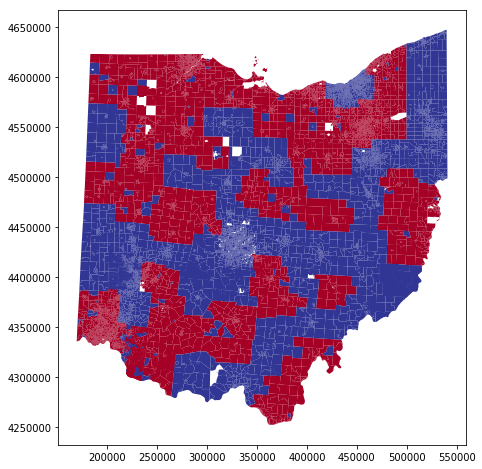

In [63]:
# plot predicted clusters
df_merged.plot(column='cluster', figsize=[8,8], cmap='RdYlBu')

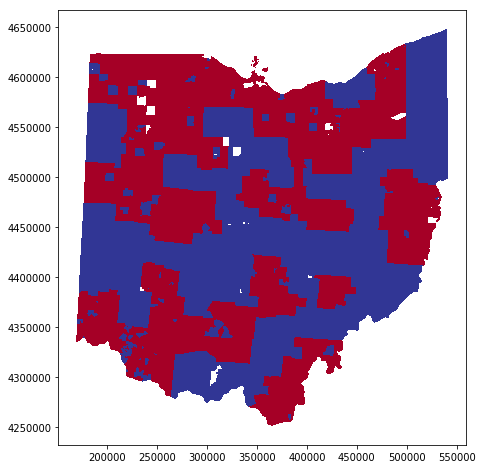

In [64]:
# plot clusters
df_merged.plot(column='cluster', figsize=[8,8], antialiased=False, cmap='RdYlBu')

#### Methodology: Investigate cluster characteristics

In [65]:
# function that sorts most common venues for each precinct
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [66]:
# MAY NEED TO RECREATE WILL ALL Precinct_ID's...
print(precinct_grouped.shape)
precinct_grouped.head()

(10214, 478)


,Precinct_ID,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Medical Supply

In [67]:
# create dataframe using this function
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Precinct_ID']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
precinct_venues_sorted = pd.DataFrame(columns=columns)
precinct_venues_sorted['Precinct_ID'] = precinct_grouped['Precinct_ID']

for ind in np.arange(precinct_grouped.shape[0]):
    precinct_venues_sorted.iloc[ind, 1:] = return_most_common_venues(precinct_grouped.iloc[ind, :], num_top_venues)

In [68]:
# total number of categories
nv = precinct_grouped.shape[1]-1

# loop over all precincts
for ind in range(0,precinct_venues_sorted.shape[0]):
    
    # calculate number of venues in this precinct (assumes zero-value is most common)
    nnonzero = nv-precinct_grouped.iloc[ind, 1:].value_counts()[0]
    
    # check if there are less than 10 venues in the precinct
    if (nnonzero<10):
        for inv in range(nnonzero+1,num_top_venues+1):
            precinct_venues_sorted.iloc[ind, inv] = 'None'

In [69]:
# check
print(precinct_venues_sorted.shape)
precinct_venues_sorted.head()

(10214, 11)


,Precinct_ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Gas Station,Fast Food Restaurant,Pizza Place,Discount Store,Bar,Liquor Store,Performing Arts Venue,Italian Restaurant,None,None
1,1,Fast Food Restaurant,Discount Store,Pizza Place,Seafood Restaurant,Motel,American Restaurant,Video Game Store,Department Store,Sandwich Place,Gymnastics Gym
2,2,Gas Station,Fast Food Restaurant,Pizza Place,Discount Store,Bar,Liquor Store,Performing Arts Venue,Italian Restaurant,None,None
3,3,Home Service,Department Store,None,None,None,None,None,None,None,None
4,5,Construction & Landscaping,Garden Center,Tree,None,None,None,None,None,None,None


In [72]:
# NEED A DF merging 'precinct_venues_sorted' df and 'cluster' COLUMN ...
precinct_sorted_cluster_outer = df_merged.merge(precinct_venues_sorted, how='outer', on='Precinct_ID')

In [73]:
print(precinct_sorted_cluster_outer.shape)
precinct_sorted_cluster_outer.head()

(10295, 532)


,cluster,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Healt

In [74]:
# assign value of zero to all NaN values in one-hot section of df_merged
precinct_sorted_cluster_outer.fillna('None', inplace=True)

In [75]:
print(precinct_sorted_cluster_outer.shape)
precinct_sorted_cluster_outer.head()

(10295, 532)


,cluster,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bavarian Restaurant,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Credit Union,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donut Shop,Driving School,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fire Station,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flight School,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Healt

In [76]:
kclusters

2

In [78]:
precinct_sorted_cluster_outer.iloc[0,522]

'Gas Station'

In [80]:
precinct_sorted_cluster_outer.iloc[0,531]

'None'

In [81]:
# initialize list of cluster labels
prlabels = []

# loop of number of clusters
for ik in range(0,kclusters):
    print(ik)
    # create series/dataframe of '1st Most Common Venue'
    prk = precinct_sorted_cluster_outer.loc[precinct_sorted_cluster_outer['cluster'] == ik, precinct_sorted_cluster_outer.columns[list(range(522,531))]]
    # count unique occurences
    prcounts = prk.iloc[:,0].value_counts()
    print(prcounts)
    # identify #1 most common venue 
    prlabels.append(prcounts.index[0])
    #print(tmlabels[ik-1])

0
Pizza Place                     730
Fast Food Restaurant            656
American Restaurant             449
Sandwich Place                  315
Discount Store                  289
Bar                             234
Park                            183
Gas Station                     132
Convenience Store               130
Ice Cream Shop                  125
Construction & Landscaping      119
Coffee Shop                      88
None                             81
Bank                             69
Golf Course                      60
Zoo Exhibit                      59
Trail                            56
Clothing Store                   54
Food                             53
Grocery Store                    49
Farm                             46
Mexican Restaurant               43
Home Service                     42
Campground                       39
Pharmacy                         39
Hotel                            39
Business Service                 37
Miscellaneous Shop        